# Streamlining the CSVs
Rather than creating separate CSVs for each year, we made one report on FanGraphs that encompasses 2015 through 2021, with a minimum of 90 plate appearances across the board to get us 3,000 observations. This way we don't need a for loop to get the initial dataframe. It also gives us a 'Season' column that will come in handy later. Because of the timing this gives us an additional month of data for 2021, rather than cutting it off at the All-Star break.

We also checked the "Split Teams" box on FanGraphs, which separates a player's numbers for each team if he played for more than one team that year. This eliminates missing values (i.e. the '- - -' string) in the 'Team' column.

A lot of the wrangling is the same as was presented in the proposal. Anything different will be indicated in a markdown cell.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
FanGraphs_df = pd.read_csv("FG_Stats_081621.csv")

# Additional features
We've added a few new features<br>

**wOBA:** Weighted on-base average. Takes all aspects of hitting into account, putting more weight proportionately on home runs and extra-base hits.<br>
**wRC:** Weighted runs created. Measures a player's ability to get on base and his ability to hit for extra bases. It also accounts for era and ballpark factors.<br>
**Soft%, Medium% and Hard%** Percentage of balls hit that are soft, medium and hard. Hard% differs from the HardHit% in the Statcast numbers. We can explore the differences further during Exploratory Data Analysis. But we want to include this grouping so that at least we can compare medium/hard and medium/soft ratios.<br>
**CStr%** A plate-discipline metric. Percentage of pitches that are called strikes, pitches in the strike zone that a batter doesn't swing at.

In [3]:
FanGraphs_df.head()

,Season,Name,Team,Age,AB,PA,HR,H,1B,2B,...,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,playerid
0,2021,Byron Buxton,MIN,27,103,110,10,38,17,11,...,93.1,8.6,16,20.5%,115.6,45,57.7%,78,10.6%,14161
1,2020,Juan Soto,WSN,21,154,196,13,54,27,14,...,92.1,4.2,22,17.5%,113.3,65,51.6%,126,18.5%,20123
2,2020,Ke'Bryan Hayes,PIT,23,85,95,5,32,18,7,...,92.8,7.4,6,9.2%,110.3,36,55.4%,65,19.3%,18577
3,2015,Bryce Harper,WSN,22,521,654,42,172,91,38,...,91.4,14.7,48,12.2%,116.0,188,47.7%,394,11.8%,11579
4,2018,Luke Voit,NYY,27,132,148,14,44,25,5,...,93.0,15.3,19,20.4%,112.3,51,54.8%,93,11.5%,14811


In [4]:
FanGraphs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3101 entries, 0 to 3100
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      3101 non-null   int64  
 1   Name        3101 non-null   object 
 2   Team        3101 non-null   object 
 3   Age         3101 non-null   int64  
 4   AB          3101 non-null   int64  
 5   PA          3101 non-null   int64  
 6   HR          3101 non-null   int64  
 7   H           3101 non-null   int64  
 8   1B          3101 non-null   int64  
 9   2B          3101 non-null   int64  
 10  3B          3101 non-null   int64  
 11  BB%         3101 non-null   object 
 12  K%          3101 non-null   object 
 13  BB/K        3101 non-null   float64
 14  AVG         3101 non-null   float64
 15  SLG         3101 non-null   float64
 16  OBP         3101 non-null   float64
 17  ISO         3101 non-null   float64
 18  BABIP       3101 non-null   float64
 19  GB/FB       3101 non-null  

In [5]:
FanGraphs_df.describe()

,Season,Age,AB,PA,HR,H,1B,2B,3B,BB/K,...,GB/FB,wOBA,wRC,EV,LA,Barrels,maxEV,HardHit,Events,playerid
count,3101.000000,3101.000000,3101.000000,3101.000000,3101.000000,3101.000000,3101.000000,3101.000000,3101.000000,3101.000000,...,3101.000000,3101.000000,3101.000000,3101.000000,3101.000000,3101.000000,3101.000000,3101.000000,3101.000000,3101.000000
mean,2017.870364,28.265076,298.611416,333.792648,11.028700,76.913576,49.028378,15.342148,1.514350,0.412464,...,1.329697,0.315168,42.068365,88.256562,12.243663,14.673976,109.755659,82.645276,231.129313,10465.163496
std,1.980867,3.784353,161.392492,180.811186,9.432758,46.843992,30.691732,10.184808,1.910633,0.204041,...,0.541969,0.044585,29.497083,2.365581,4.753918,12.897929,3.424251,52.911916,132.897362,5098.218279
min,2015.000000,19.000000,73.000000,90.000000,0.000000,9.000000,5.000000,0.000000,0.000000,0.040000,...,0.300000,0.150000,-2.000000,78.200000,-7.900000,0.000000,97.700000,4.000000,41.000000,211.000000
25%,2016.000000,25.000000,157.000000,176.000000,4.000000,37.000000,24.000000,7.000000,0.000000,0.270000,...,0.960000,0.287000,18.000000,86.700000,9.000000,5.000000,107.500000,39.000000,117.000000,5930.000000
50%,2018.000000,28.000000,261.000000,291.000000,8.000000,65.000000,41.000000,13.000000,1.000000,0.380000,...,1.220000,0.316000,35.000000,88.300000,12.300000,11.000000,109.600000,68.000000,199.000000,10847.000000
75%,2019.000000,31.000000,425.000000,476.000000,16.000000,112.000000,70.000000,22.000000,2.000000,0.520000,...,1.570000,0.344000,60.000000,89.800000,15.500000,21.000000,112.100000,120.000000,331.000000,14158.000000
max,2021.000000,43.000000,681.000000,747.000000,59.000000,216.000000,170.000000,56.000000,15.000000,2.400000,...,5.820000,0.489000,151.000000,96.100000,29.800000,84.000000,122.200000,249.000000,599.000000,27506.000000


In [6]:
print(all(FanGraphs_df))

True


In [7]:
FanGraphs_df['HR/PA'] = round(FanGraphs_df['HR']/FanGraphs_df['PA'], 4)

In [8]:
FanGraphs_df.head()

,Season,Name,Team,Age,AB,PA,HR,H,1B,2B,...,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,playerid,HR/PA
0,2021,Byron Buxton,MIN,27,103,110,10,38,17,11,...,8.6,16,20.5%,115.6,45,57.7%,78,10.6%,14161,0.0909
1,2020,Juan Soto,WSN,21,154,196,13,54,27,14,...,4.2,22,17.5%,113.3,65,51.6%,126,18.5%,20123,0.0663
2,2020,Ke'Bryan Hayes,PIT,23,85,95,5,32,18,7,...,7.4,6,9.2%,110.3,36,55.4%,65,19.3%,18577,0.0526
3,2015,Bryce Harper,WSN,22,521,654,42,172,91,38,...,14.7,48,12.2%,116.0,188,47.7%,394,11.8%,11579,0.0642
4,2018,Luke Voit,NYY,27,132,148,14,44,25,5,...,15.3,19,20.4%,112.3,51,54.8%,93,11.5%,14811,0.0946


## Sorting values by season
And looking at head and tail of df to make sure head is all 2015 and tail is all 2021

In [9]:
FanGraphs_df = FanGraphs_df.sort_values(by = 'Season', ignore_index=True)

In [10]:
FanGraphs_df.head()

,Season,Name,Team,Age,AB,PA,HR,H,1B,2B,...,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,playerid,HR/PA
0,2015,Kurt Suzuki,MIN,31,433,479,5,104,82,17,...,13.7,3,0.8%,105.8,112,29.2%,384,18.5%,8259,0.0104
1,2015,Ryan Flaherty,BAL,28,267,301,9,54,34,8,...,10.2,9,4.7%,112.1,59,31.1%,190,17.0%,7888,0.0299
2,2015,Cliff Pennington,TOR,31,75,92,2,12,7,3,...,13.0,3,5.0%,103.5,13,21.7%,60,14.5%,3395,0.0217
3,2015,Roberto Perez,CLE,26,184,226,7,42,25,9,...,3.3,11,8.7%,112.0,50,39.4%,127,21.8%,2900,0.0310
4,2015,Peter Bourjos,STL,28,195,225,4,39,24,8,...,13.0,5,3.5%,108.8,35,24.8%,141,17.0%,2578,0.0178


In [11]:
FanGraphs_df.tail()

,Season,Name,Team,Age,AB,PA,HR,H,1B,2B,...,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,playerid,HR/PA
3096,2021,Harold Castro,DET,27,217,237,1,59,53,5,...,10.8,4,2.4%,107.2,63,37.1%,170,13.7%,14691,0.0042
3097,2021,Jordan Luplow,CLE,27,98,121,7,17,5,5,...,22.4,9,13.4%,107.6,23,34.3%,67,16.2%,16424,0.0579
3098,2021,Gregory Polanco,PIT,29,303,345,11,61,40,8,...,16.2,20,9.3%,116.2,98,45.6%,215,14.8%,12907,0.0319
3099,2021,Alex Verdugo,BOS,25,407,453,11,115,79,24,...,7.1,23,6.7%,110.8,148,43.0%,344,19.0%,17027,0.0243
3100,2021,Byron Buxton,MIN,27,103,110,10,38,17,11,...,8.6,16,20.5%,115.6,45,57.7%,78,10.6%,14161,0.0909


In [12]:
harper_check = FanGraphs_df[FanGraphs_df['Name'] == 'Bryce Harper']

In [13]:
print(harper_check)

      Season          Name Team  Age   AB   PA  HR    H  1B  2B  ...    LA  \
342     2015  Bryce Harper  WSN   22  521  654  42  172  91  38  ...  14.7   
504     2016  Bryce Harper  WSN   23  506  627  24  123  73  24  ...  14.9   
965     2017  Bryce Harper  WSN   24  420  492  29  134  77  27  ...  14.1   
1707    2018  Bryce Harper  WSN   25  550  695  34  137  69  34  ...  14.5   
2242    2019  Bryce Harper  PHI   26  573  682  35  149  77  36  ...  13.8   
2546    2020  Bryce Harper  PHI   27  190  244  13   51  27   9  ...  16.0   
2760    2021  Bryce Harper  PHI   28  337  408  21  100  52  26  ...  12.9   

     Barrels Barrel%  maxEV  HardHit  HardHit%  Events  CStr%  playerid  \
342       48   12.2%  116.0      188     47.7%     394  11.8%     11579   
504       29    7.3%  112.7      143     35.8%     399  15.0%     11579   
965       31    9.6%  116.3      138     42.6%     324  11.4%     11579   
1707      39   10.0%  115.1      175     44.9%     390  11.9%     11579   


In [14]:
missing = pd.concat([FanGraphs_df.isnull().sum(), 100 * FanGraphs_df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
Season,0,0.0
Soft%,0,0.0
Z-Swing%,0,0.0
Swing%,0,0.0
O-Contact%,0,0.0
Z-Contact%,0,0.0
Contact%,0,0.0
Zone%,0,0.0
F-Strike%,0,0.0
SwStr%,0,0.0


In [15]:
FanGraphs_df.select_dtypes(include='object').T

,0,1,2,3,4,5,6,7,8,9,...,3091,3092,3093,3094,3095,3096,3097,3098,3099,3100
Name,Kurt Suzuki,Ryan Flaherty,Cliff Pennington,Roberto Perez,Peter Bourjos,Russell Martin,Ichiro Suzuki,Tommy Pham,James McCann,Chris Johnson,...,Hunter Renfroe,Nick Madrigal,Jorge Alfaro,Cody Bellinger,Yoan Moncada,Harold Castro,Jordan Luplow,Gregory Polanco,Alex Verdugo,Byron Buxton
Team,MIN,BAL,TOR,CLE,STL,TOR,MIA,STL,DET,CLE,...,BOS,CHW,MIA,LAD,CHW,DET,CLE,PIT,BOS,MIN
BB%,6.1%,8.6%,12.0%,14.6%,8.4%,10.5%,7.1%,11.0%,3.8%,3.2%,...,8.0%,5.1%,3.8%,10.7%,14.2%,5.5%,17.4%,10.1%,8.8%,3.6%
K%,12.3%,26.9%,21.7%,28.3%,26.2%,20.9%,11.6%,23.7%,21.2%,26.9%,...,22.4%,7.9%,34.0%,28.1%,26.2%,22.8%,25.6%,27.2%,14.6%,22.7%
LD%,19.4%,14.1%,19.6%,19.7%,16.3%,16.4%,18.3%,21.2%,23.1%,21.5%,...,19.4%,20.3%,23.1%,23.1%,27.0%,36.0%,12.1%,17.3%,21.6%,20.5%
GB%,43.0%,49.7%,41.1%,53.3%,48.9%,50.6%,58.5%,51.3%,49.8%,55.4%,...,41.2%,59.9%,52.4%,27.9%,43.3%,40.2%,30.3%,37.4%,50.7%,48.7%
FB%,37.7%,36.2%,39.3%,27.0%,34.8%,33.0%,23.2%,27.4%,27.0%,23.1%,...,39.5%,19.8%,24.5%,49.0%,29.7%,23.8%,57.6%,45.3%,27.7%,30.8%
IFFB%,11.3%,9.0%,13.6%,6.1%,21.3%,18.9%,7.4%,3.2%,7.2%,0.0%,...,16.4%,0.0%,2.9%,12.5%,7.7%,0.0%,18.4%,10.3%,4.2%,4.2%
HR/FB,3.5%,13.4%,9.1%,21.2%,8.5%,20.7%,1.2%,16.1%,8.4%,6.7%,...,18.1%,5.6%,8.6%,12.5%,12.8%,2.6%,18.4%,11.3%,11.6%,41.7%
IFH%,4.9%,7.6%,0.0%,1.5%,3.0%,6.5%,6.9%,6.9%,4.6%,2.8%,...,6.6%,10.1%,8.0%,9.8%,7.9%,0.0%,5.0%,8.8%,4.0%,15.8%


In [16]:
FanGraphs_df_nums = FanGraphs_df.select_dtypes(include=['int64', 'float64'])

In [17]:
FanGraphs_df_nums.head()

,Season,Age,AB,PA,HR,H,1B,2B,3B,BB/K,...,wOBA,wRC,EV,LA,Barrels,maxEV,HardHit,Events,playerid,HR/PA
0,2015,31,433,479,5,104,82,17,0,0.49,...,0.269,37,87.7,13.7,3,105.8,112,384,8259,0.0104
1,2015,28,267,301,9,54,34,8,3,0.32,...,0.279,26,89.3,10.2,9,112.1,59,190,7888,0.0299
2,2015,31,75,92,2,12,7,3,0,0.55,...,0.251,6,84.5,13.0,3,103.5,13,60,3395,0.0217
3,2015,26,184,226,7,42,25,9,1,0.52,...,0.331,29,90.6,3.3,11,112.0,50,127,2900,0.0310
4,2015,28,195,225,4,39,24,8,3,0.32,...,0.271,18,85.5,13.0,5,108.8,35,141,2578,0.0178


In [18]:
FanGraphs_df_obj = FanGraphs_df.select_dtypes(include='object')

In [19]:
FanGraphs_df_obj.head()

,Name,Team,BB%,K%,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,...,SwStr%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,Barrel%,HardHit%,CStr%
0,Kurt Suzuki,MIN,6.1%,12.3%,19.4%,43.0%,37.7%,11.3%,3.5%,4.9%,...,5.4%,41.4%,34.9%,23.7%,13.8%,61.5%,24.7%,0.8%,29.2%,18.5%
1,Ryan Flaherty,BAL,8.6%,26.9%,14.1%,49.7%,36.2%,9.0%,13.4%,7.6%,...,10.4%,41.1%,35.3%,23.7%,16.8%,54.2%,28.9%,4.7%,31.1%,17.0%
2,Cliff Pennington,TOR,12.0%,21.7%,19.6%,41.1%,39.3%,13.6%,9.1%,0.0%,...,8.1%,56.7%,16.7%,26.7%,21.7%,53.3%,25.0%,5.0%,21.7%,14.5%
3,Roberto Perez,CLE,14.6%,28.3%,19.7%,53.3%,27.0%,6.1%,21.2%,1.5%,...,9.5%,37.8%,37.8%,24.4%,24.4%,44.1%,31.5%,8.7%,39.4%,21.8%
4,Peter Bourjos,STL,8.4%,26.2%,16.3%,48.9%,34.8%,21.3%,8.5%,3.0%,...,13.0%,37.6%,35.5%,27.0%,22.7%,54.6%,22.7%,3.5%,24.8%,17.0%


In [20]:
names_and_teams = FanGraphs_df_obj.iloc[:,:2]

In [21]:
names_and_teams.head()

,Name,Team
0,Kurt Suzuki,MIN
1,Ryan Flaherty,BAL
2,Cliff Pennington,TOR
3,Roberto Perez,CLE
4,Peter Bourjos,STL


In [22]:
FanGraphs_df_obj = FanGraphs_df_obj.drop(['Name', 'Team'], 1)

In [23]:
FanGraphs_df_obj.head()

,BB%,K%,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,O-Swing%,Z-Swing%,...,SwStr%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,Barrel%,HardHit%,CStr%
0,6.1%,12.3%,19.4%,43.0%,37.7%,11.3%,3.5%,4.9%,28.3%,63.8%,...,5.4%,41.4%,34.9%,23.7%,13.8%,61.5%,24.7%,0.8%,29.2%,18.5%
1,8.6%,26.9%,14.1%,49.7%,36.2%,9.0%,13.4%,7.6%,27.6%,66.4%,...,10.4%,41.1%,35.3%,23.7%,16.8%,54.2%,28.9%,4.7%,31.1%,17.0%
2,12.0%,21.7%,19.6%,41.1%,39.3%,13.6%,9.1%,0.0%,26.1%,75.0%,...,8.1%,56.7%,16.7%,26.7%,21.7%,53.3%,25.0%,5.0%,21.7%,14.5%
3,14.6%,28.3%,19.7%,53.3%,27.0%,6.1%,21.2%,1.5%,17.3%,59.0%,...,9.5%,37.8%,37.8%,24.4%,24.4%,44.1%,31.5%,8.7%,39.4%,21.8%
4,8.4%,26.2%,16.3%,48.9%,34.8%,21.3%,8.5%,3.0%,32.4%,69.9%,...,13.0%,37.6%,35.5%,27.0%,22.7%,54.6%,22.7%,3.5%,24.8%,17.0%


In [25]:
def remove_pct(rows, cols, df):
    for i in range(rows):
        for j in range(cols):
            df.iloc[i, j] = df.iloc[i, j].strip('%')

In [26]:
remove_pct(3101, 26, FanGraphs_df_obj)

In [27]:
FanGraphs_df_obj_cols = list(FanGraphs_df_obj.columns)

In [28]:
print(FanGraphs_df_obj_cols)

['BB%', 'K%', 'LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'IFH%', 'O-Swing%', 'Z-Swing%', 'Swing%', 'O-Contact%', 'Z-Contact%', 'Contact%', 'Zone%', 'F-Strike%', 'SwStr%', 'Pull%', 'Cent%', 'Oppo%', 'Soft%', 'Med%', 'Hard%', 'Barrel%', 'HardHit%', 'CStr%']


In [29]:
FanGraphs_df_obj.head()

,BB%,K%,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,O-Swing%,Z-Swing%,...,SwStr%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,Barrel%,HardHit%,CStr%
0,6.1,12.3,19.4,43.0,37.7,11.3,3.5,4.9,28.3,63.8,...,5.4,41.4,34.9,23.7,13.8,61.5,24.7,0.8,29.2,18.5
1,8.6,26.9,14.1,49.7,36.2,9.0,13.4,7.6,27.6,66.4,...,10.4,41.1,35.3,23.7,16.8,54.2,28.9,4.7,31.1,17.0
2,12.0,21.7,19.6,41.1,39.3,13.6,9.1,0.0,26.1,75.0,...,8.1,56.7,16.7,26.7,21.7,53.3,25.0,5.0,21.7,14.5
3,14.6,28.3,19.7,53.3,27.0,6.1,21.2,1.5,17.3,59.0,...,9.5,37.8,37.8,24.4,24.4,44.1,31.5,8.7,39.4,21.8
4,8.4,26.2,16.3,48.9,34.8,21.3,8.5,3.0,32.4,69.9,...,13.0,37.6,35.5,27.0,22.7,54.6,22.7,3.5,24.8,17.0


In [30]:
FanGraphs_df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3101 entries, 0 to 3100
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   BB%         3101 non-null   object
 1   K%          3101 non-null   object
 2   LD%         3101 non-null   object
 3   GB%         3101 non-null   object
 4   FB%         3101 non-null   object
 5   IFFB%       3101 non-null   object
 6   HR/FB       3101 non-null   object
 7   IFH%        3101 non-null   object
 8   O-Swing%    3101 non-null   object
 9   Z-Swing%    3101 non-null   object
 10  Swing%      3101 non-null   object
 11  O-Contact%  3101 non-null   object
 12  Z-Contact%  3101 non-null   object
 13  Contact%    3101 non-null   object
 14  Zone%       3101 non-null   object
 15  F-Strike%   3101 non-null   object
 16  SwStr%      3101 non-null   object
 17  Pull%       3101 non-null   object
 18  Cent%       3101 non-null   object
 19  Oppo%       3101 non-null   object
 20  Soft%   

In [31]:
def change_to_num(cols, df):
    for col in cols:
        df[col] = pd.to_numeric(df[col])  

In [32]:
change_to_num(FanGraphs_df_obj_cols, FanGraphs_df_obj)

In [33]:
FanGraphs_df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3101 entries, 0 to 3100
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BB%         3101 non-null   float64
 1   K%          3101 non-null   float64
 2   LD%         3101 non-null   float64
 3   GB%         3101 non-null   float64
 4   FB%         3101 non-null   float64
 5   IFFB%       3101 non-null   float64
 6   HR/FB       3101 non-null   float64
 7   IFH%        3101 non-null   float64
 8   O-Swing%    3101 non-null   float64
 9   Z-Swing%    3101 non-null   float64
 10  Swing%      3101 non-null   float64
 11  O-Contact%  3101 non-null   float64
 12  Z-Contact%  3101 non-null   float64
 13  Contact%    3101 non-null   float64
 14  Zone%       3101 non-null   float64
 15  F-Strike%   3101 non-null   float64
 16  SwStr%      3101 non-null   float64
 17  Pull%       3101 non-null   float64
 18  Cent%       3101 non-null   float64
 19  Oppo%       3101 non-null  

# Putting it all back together
Unlike before, we know that we need team names. So along with player names we're concatenating those two columns with the columns that were just converted from objects to floats. Then we'll concatenate with the rest of the columns so that the original dataframe is re-assembled.

In [34]:
FanGraphs_df_obj = pd.concat([names_and_teams, FanGraphs_df_obj], axis = 1)

In [35]:
FanGraphs_df_obj.head()

,Name,Team,BB%,K%,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,...,SwStr%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,Barrel%,HardHit%,CStr%
0,Kurt Suzuki,MIN,6.1,12.3,19.4,43.0,37.7,11.3,3.5,4.9,...,5.4,41.4,34.9,23.7,13.8,61.5,24.7,0.8,29.2,18.5
1,Ryan Flaherty,BAL,8.6,26.9,14.1,49.7,36.2,9.0,13.4,7.6,...,10.4,41.1,35.3,23.7,16.8,54.2,28.9,4.7,31.1,17.0
2,Cliff Pennington,TOR,12.0,21.7,19.6,41.1,39.3,13.6,9.1,0.0,...,8.1,56.7,16.7,26.7,21.7,53.3,25.0,5.0,21.7,14.5
3,Roberto Perez,CLE,14.6,28.3,19.7,53.3,27.0,6.1,21.2,1.5,...,9.5,37.8,37.8,24.4,24.4,44.1,31.5,8.7,39.4,21.8
4,Peter Bourjos,STL,8.4,26.2,16.3,48.9,34.8,21.3,8.5,3.0,...,13.0,37.6,35.5,27.0,22.7,54.6,22.7,3.5,24.8,17.0


In [36]:
FanGraphs_df_obj.transpose()

,0,1,2,3,4,5,6,7,8,9,...,3091,3092,3093,3094,3095,3096,3097,3098,3099,3100
Name,Kurt Suzuki,Ryan Flaherty,Cliff Pennington,Roberto Perez,Peter Bourjos,Russell Martin,Ichiro Suzuki,Tommy Pham,James McCann,Chris Johnson,...,Hunter Renfroe,Nick Madrigal,Jorge Alfaro,Cody Bellinger,Yoan Moncada,Harold Castro,Jordan Luplow,Gregory Polanco,Alex Verdugo,Byron Buxton
Team,MIN,BAL,TOR,CLE,STL,TOR,MIA,STL,DET,CLE,...,BOS,CHW,MIA,LAD,CHW,DET,CLE,PIT,BOS,MIN
BB%,6.1,8.6,12,14.6,8.4,10.5,7.1,11,3.8,3.2,...,8,5.1,3.8,10.7,14.2,5.5,17.4,10.1,8.8,3.6
K%,12.3,26.9,21.7,28.3,26.2,20.9,11.6,23.7,21.2,26.9,...,22.4,7.9,34,28.1,26.2,22.8,25.6,27.2,14.6,22.7
LD%,19.4,14.1,19.6,19.7,16.3,16.4,18.3,21.2,23.1,21.5,...,19.4,20.3,23.1,23.1,27,36,12.1,17.3,21.6,20.5
GB%,43,49.7,41.1,53.3,48.9,50.6,58.5,51.3,49.8,55.4,...,41.2,59.9,52.4,27.9,43.3,40.2,30.3,37.4,50.7,48.7
FB%,37.7,36.2,39.3,27,34.8,33,23.2,27.4,27,23.1,...,39.5,19.8,24.5,49,29.7,23.8,57.6,45.3,27.7,30.8
IFFB%,11.3,9,13.6,6.1,21.3,18.9,7.4,3.2,7.2,0,...,16.4,0,2.9,12.5,7.7,0,18.4,10.3,4.2,4.2
HR/FB,3.5,13.4,9.1,21.2,8.5,20.7,1.2,16.1,8.4,6.7,...,18.1,5.6,8.6,12.5,12.8,2.6,18.4,11.3,11.6,41.7
IFH%,4.9,7.6,0,1.5,3,6.5,6.9,6.9,4.6,2.8,...,6.6,10.1,8,9.8,7.9,0,5,8.8,4,15.8


In [37]:
FanGraphs_df = pd.concat([FanGraphs_df_obj, FanGraphs_df_nums], axis = 1)

In [38]:
FanGraphs_df.head()

,Name,Team,BB%,K%,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,...,wOBA,wRC,EV,LA,Barrels,maxEV,HardHit,Events,playerid,HR/PA
0,Kurt Suzuki,MIN,6.1,12.3,19.4,43.0,37.7,11.3,3.5,4.9,...,0.269,37,87.7,13.7,3,105.8,112,384,8259,0.0104
1,Ryan Flaherty,BAL,8.6,26.9,14.1,49.7,36.2,9.0,13.4,7.6,...,0.279,26,89.3,10.2,9,112.1,59,190,7888,0.0299
2,Cliff Pennington,TOR,12.0,21.7,19.6,41.1,39.3,13.6,9.1,0.0,...,0.251,6,84.5,13.0,3,103.5,13,60,3395,0.0217
3,Roberto Perez,CLE,14.6,28.3,19.7,53.3,27.0,6.1,21.2,1.5,...,0.331,29,90.6,3.3,11,112.0,50,127,2900,0.0310
4,Peter Bourjos,STL,8.4,26.2,16.3,48.9,34.8,21.3,8.5,3.0,...,0.271,18,85.5,13.0,5,108.8,35,141,2578,0.0178


In [39]:
FanGraphs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3101 entries, 0 to 3100
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        3101 non-null   object 
 1   Team        3101 non-null   object 
 2   BB%         3101 non-null   float64
 3   K%          3101 non-null   float64
 4   LD%         3101 non-null   float64
 5   GB%         3101 non-null   float64
 6   FB%         3101 non-null   float64
 7   IFFB%       3101 non-null   float64
 8   HR/FB       3101 non-null   float64
 9   IFH%        3101 non-null   float64
 10  O-Swing%    3101 non-null   float64
 11  Z-Swing%    3101 non-null   float64
 12  Swing%      3101 non-null   float64
 13  O-Contact%  3101 non-null   float64
 14  Z-Contact%  3101 non-null   float64
 15  Contact%    3101 non-null   float64
 16  Zone%       3101 non-null   float64
 17  F-Strike%   3101 non-null   float64
 18  SwStr%      3101 non-null   float64
 19  Pull%       3101 non-null  

In [40]:
FanGraphs_df.describe().T

,count,mean,std,min,25%,50%,75%,max
BB%,3101.0,8.424186,3.297971,0.900,6.0000,8.2000,10.4000,24.4000
K%,3101.0,22.128120,6.517708,3.100,17.5000,21.8000,26.4000,46.3000
LD%,3101.0,21.041277,3.677023,5.200,18.6000,21.0000,23.4000,39.7000
GB%,3101.0,43.507868,7.279032,19.500,38.4000,43.3000,48.5000,66.9000
FB%,3101.0,35.451564,7.279443,11.300,30.5000,35.5000,40.4000,64.9000
IFFB%,3101.0,9.623670,5.106001,0.000,6.1000,9.3000,12.5000,31.8000
HR/FB,3101.0,12.991067,7.191940,0.000,7.8000,12.3000,17.5000,44.4000
IFH%,3101.0,6.611867,3.687816,0.000,4.1000,6.3000,8.8000,33.3000
O-Swing%,3101.0,30.815543,6.190050,13.800,26.5000,30.5000,34.8000,54.0000
Z-Swing%,3101.0,67.986553,6.043148,48.700,63.9000,68.0000,72.0000,88.4000


In [41]:
moving_season = FanGraphs_df.pop("Season")
FanGraphs_df.insert(0, "Season", moving_season)

In [42]:
FanGraphs_df.head()

,Season,Name,Team,BB%,K%,LD%,GB%,FB%,IFFB%,HR/FB,...,wOBA,wRC,EV,LA,Barrels,maxEV,HardHit,Events,playerid,HR/PA
0,2015,Kurt Suzuki,MIN,6.1,12.3,19.4,43.0,37.7,11.3,3.5,...,0.269,37,87.7,13.7,3,105.8,112,384,8259,0.0104
1,2015,Ryan Flaherty,BAL,8.6,26.9,14.1,49.7,36.2,9.0,13.4,...,0.279,26,89.3,10.2,9,112.1,59,190,7888,0.0299
2,2015,Cliff Pennington,TOR,12.0,21.7,19.6,41.1,39.3,13.6,9.1,...,0.251,6,84.5,13.0,3,103.5,13,60,3395,0.0217
3,2015,Roberto Perez,CLE,14.6,28.3,19.7,53.3,27.0,6.1,21.2,...,0.331,29,90.6,3.3,11,112.0,50,127,2900,0.0310
4,2015,Peter Bourjos,STL,8.4,26.2,16.3,48.9,34.8,21.3,8.5,...,0.271,18,85.5,13.0,5,108.8,35,141,2578,0.0178


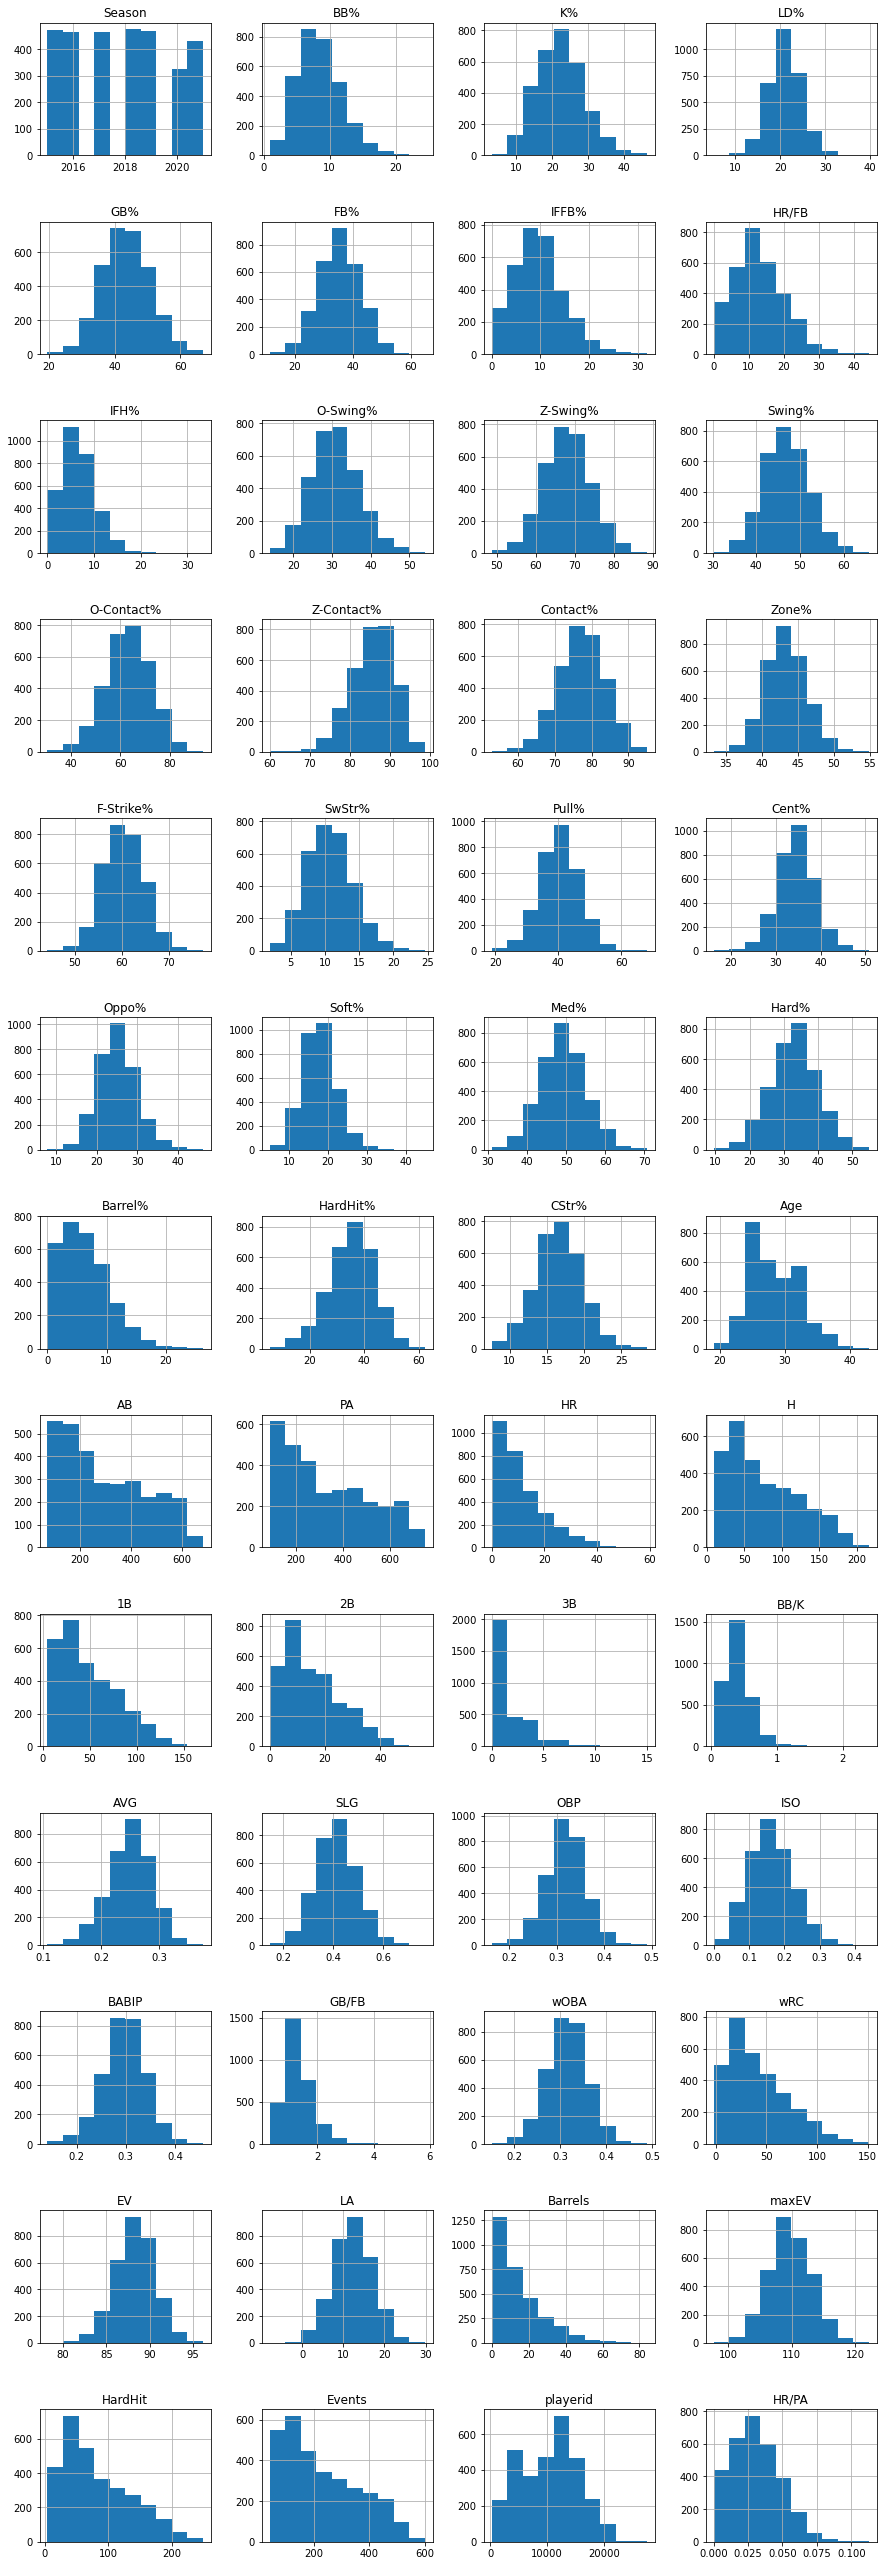

In [43]:
FanGraphs_df.hist(figsize = (15, 50), layout = (14, 4))
plt.subplots_adjust(hspace=0.5);

## Confirming there are no placeholder strings in team names

In [59]:
team_codes = FanGraphs_df['Team'].unique()

In [60]:
team_codes

array(['MIN', 'BAL', 'TOR', 'CLE', 'STL', 'MIA', 'DET', 'ARI', 'ATL',
       'CHW', 'KCR', 'SEA', 'WSN', 'CHC', 'TBR', 'BOS', 'SFG', 'CIN',
       'PIT', 'TEX', 'HOU', 'COL', 'NYM', 'NYY', 'SDP', 'MIL', 'LAD',
       'PHI', 'LAA', 'OAK'], dtype=object)

# A closer look at plate appearances
Histogram of plate appearances with 30 bins. We have a low requirement for plate appearances in a season so that we have enough observations, but it seems like the highest frequencies of plate appearances are on the low end. That raises the possiblity that some of the percentage features could be outliers since 90 plate appearances is a small sample size for a full season and thus more prone to extremes. 

array([[<AxesSubplot:title={'center':'PA'}>]], dtype=object)

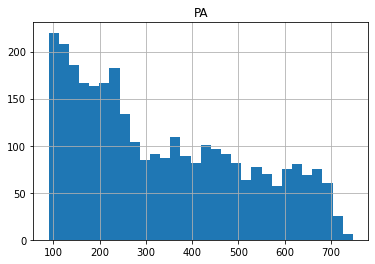

In [46]:
FanGraphs_df.hist(column = 'PA', bins = 30)

# Cut it off at 150?
It seems like there's a sharp increase in frequency when we get below 150 plate appearances. So let's slice the dataframe at 150 and below and see what we get.

In [47]:
less_than_150 = FanGraphs_df[FanGraphs_df['PA'] < 150]

In [48]:
len(less_than_150)

571

In [49]:
less_than_150.describe().T

,count,mean,std,min,25%,50%,75%,max
Season,571.0,2018.278459,2.035960,2015.000,2016.0000,2018.0000,2020.0000,2021.0000
BB%,571.0,7.918914,3.550853,0.900,5.3000,7.5000,10.2000,19.3000
K%,571.0,24.611208,7.471016,3.100,19.6000,24.2000,29.2000,46.3000
LD%,571.0,20.811909,4.939106,5.200,17.5000,20.6000,23.9000,39.7000
GB%,571.0,44.247986,8.294622,19.700,38.6000,43.7000,49.4000,66.7000
FB%,571.0,34.943433,8.027744,11.300,29.4000,34.9000,40.1000,60.5000
IFFB%,571.0,10.376883,6.599008,0.000,5.3000,9.8000,15.0000,31.8000
HR/FB,571.0,10.988967,8.253597,0.000,4.8000,9.8000,15.6000,44.4000
IFH%,571.0,6.676182,4.951965,0.000,3.1000,6.1000,9.4000,33.3000
O-Swing%,571.0,31.061821,6.901994,13.800,26.2500,30.2000,35.6000,53.9000


# Looks like we're OK
The means and medians look reasonably close in both the full dataframe and the 150-and-below dataframe. And the pattern of the scatterplots below for both the full and sliced dataframes look similar to the one in the proposal.

<AxesSubplot:xlabel='HR/PA', ylabel='HR'>

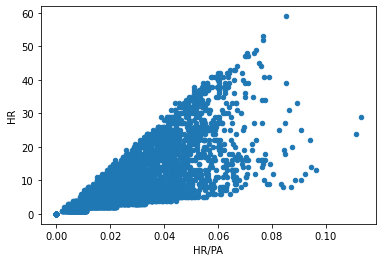

In [50]:
FanGraphs_df.plot(x='HR/PA', y='HR', kind='scatter')

<AxesSubplot:xlabel='HR/PA', ylabel='HR'>

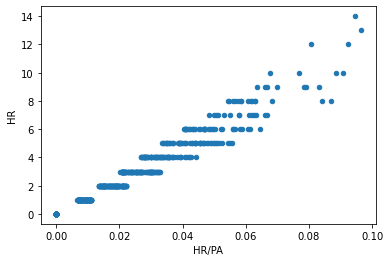

In [51]:
less_than_150.plot(x='HR/PA', y='HR', kind='scatter')

# Ballpark data
Ballpark data is coming from MLB.com. ESPN.com had the city names for each park but not the park names. We couldn't identify parks just by city names because there are two parks in Chicago.

The data was copied and pasted by hand from MLB.com into Excel because it was hard to locate the dataframe using Beautiful Soup. When copying into Excel, the team logos were also inadvertently copied and showed up on top of the spreadsheet. It looked very messy, but it turned out we could still delete columns we didn't need and save the file. Pandas' read_excel method didn't react to the logos and it worked out fine. Not sure if that kind of crazy data wrangling happens in the real world.

In [52]:
list_of_park_dfs = []

In [53]:
for i in range(2015, 2022):
    new_df = pd.read_excel('parks_' + str(i) + '.xls')
    list_of_park_dfs.append(new_df)   

In [54]:
parks_df = pd.concat(list_of_park_dfs, ignore_index=True)

In [55]:
parks_df.head()

,Team,Season,Park
0,Rockies,2015,119
1,Indians,2015,94
2,Red Sox,2015,101
3,Rangers,2015,99
4,Orioles,2015,136


In [56]:
parks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Team    210 non-null    object
 1   Season  210 non-null    int64 
 2   Park    210 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.0+ KB


# Integrating ballpark data with main dataframe
First, we create an iterable of team names from the parks_df. Fortunately, those four characters before each team name don't interfere. 

In [57]:
team_names = parks_df["Team"].unique()

In [58]:
type(team_names)

numpy.ndarray

In [61]:
team_names

array(['\xa0Rockies', '\xa0Indians', '\xa0Red Sox', '\xa0Rangers',
       '\xa0Orioles', '\xa0D-backs', '\xa0Brewers', '\xa0Twins',
       '\xa0Cubs', '\xa0Astros', '\xa0Reds', '\xa0Royals',
       '\xa0Nationals', '\xa0Phillies', '\xa0Yankees', '\xa0Padres',
       '\xa0Cardinals', '\xa0White Sox', '\xa0Pirates', '\xa0Dodgers',
       '\xa0Blue Jays', '\xa0Mariners', '\xa0Tigers', '\xa0Rays',
       '\xa0Marlins', '\xa0Athletics', '\xa0Angels', '\xa0Mets',
       '\xa0Braves', '\xa0Giants'], dtype=object)

In [62]:
list(team_names)

['\xa0Rockies',
 '\xa0Indians',
 '\xa0Red Sox',
 '\xa0Rangers',
 '\xa0Orioles',
 '\xa0D-backs',
 '\xa0Brewers',
 '\xa0Twins',
 '\xa0Cubs',
 '\xa0Astros',
 '\xa0Reds',
 '\xa0Royals',
 '\xa0Nationals',
 '\xa0Phillies',
 '\xa0Yankees',
 '\xa0Padres',
 '\xa0Cardinals',
 '\xa0White Sox',
 '\xa0Pirates',
 '\xa0Dodgers',
 '\xa0Blue Jays',
 '\xa0Mariners',
 '\xa0Tigers',
 '\xa0Rays',
 '\xa0Marlins',
 '\xa0Athletics',
 '\xa0Angels',
 '\xa0Mets',
 '\xa0Braves',
 '\xa0Giants']

# Team codes list
The iterable that we created when confirming there were no placeholder strings in team names comes into play here. The team_names variable is the full team name. The team_codes variable is the three-letter code for the team that FanGraphs uses. 

In [63]:
list(team_codes)

['MIN',
 'BAL',
 'TOR',
 'CLE',
 'STL',
 'MIA',
 'DET',
 'ARI',
 'ATL',
 'CHW',
 'KCR',
 'SEA',
 'WSN',
 'CHC',
 'TBR',
 'BOS',
 'SFG',
 'CIN',
 'PIT',
 'TEX',
 'HOU',
 'COL',
 'NYM',
 'NYY',
 'SDP',
 'MIL',
 'LAD',
 'PHI',
 'LAA',
 'OAK']

In [64]:
len(team_codes)

30

In [65]:
len(team_names)

30

# Creating the dictionary
A little hard-coded, but we create a team_codes_ordered list and type the team codes in the same order as the corresponding team_names so that we can zip them into a dictionary.

In [67]:
team_codes_ordered = ['COL', 'CLE', 'BOS', 'TEX', 'BAL', 'ARI', 'MIL', 'MIN', 'CHC', 'HOU', 'CIN', 'KCR', \
                      'WSN', 'PHI', 'NYY', 'SDP', 'STL', 'CHW', 'PIT', 'LAD', 'TOR', 'SEA', 'DET', 'TBR', \
                      'MIA', 'OAK', 'LAA', 'NYM', 'ATL', 'SFG']

In [68]:
team_dict = dict(zip(team_names, team_codes_ordered))

In [69]:
team_dict

{'\xa0Rockies': 'COL',
 '\xa0Indians': 'CLE',
 '\xa0Red Sox': 'BOS',
 '\xa0Rangers': 'TEX',
 '\xa0Orioles': 'BAL',
 '\xa0D-backs': 'ARI',
 '\xa0Brewers': 'MIL',
 '\xa0Twins': 'MIN',
 '\xa0Cubs': 'CHC',
 '\xa0Astros': 'HOU',
 '\xa0Reds': 'CIN',
 '\xa0Royals': 'KCR',
 '\xa0Nationals': 'WSN',
 '\xa0Phillies': 'PHI',
 '\xa0Yankees': 'NYY',
 '\xa0Padres': 'SDP',
 '\xa0Cardinals': 'STL',
 '\xa0White Sox': 'CHW',
 '\xa0Pirates': 'PIT',
 '\xa0Dodgers': 'LAD',
 '\xa0Blue Jays': 'TOR',
 '\xa0Mariners': 'SEA',
 '\xa0Tigers': 'DET',
 '\xa0Rays': 'TBR',
 '\xa0Marlins': 'MIA',
 '\xa0Athletics': 'OAK',
 '\xa0Angels': 'LAA',
 '\xa0Mets': 'NYM',
 '\xa0Braves': 'ATL',
 '\xa0Giants': 'SFG'}

In [70]:
parks_df = parks_df.replace({"Team": team_dict})

# Ready to merge with main dataframe
Now that the three-letter codes in the team column match the three-letter codes in the main FG_Stats dataframe, we're ready to merge. But first, let's explore the data.

In [71]:
parks_df

,Team,Season,Park
0,COL,2015,119
1,CLE,2015,94
2,BOS,2015,101
3,TEX,2015,99
4,BAL,2015,136
...,...,...,...
205,STL,2021,83
206,DET,2021,72
207,MIA,2021,82
208,TBR,2021,82


array([[<AxesSubplot:title={'center':'Park'}>]], dtype=object)

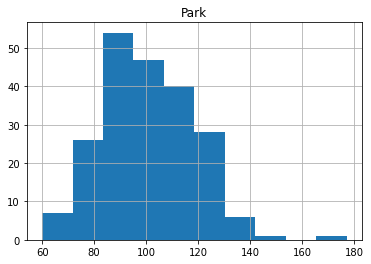

In [72]:
parks_df.hist(column = 'Park')

In [73]:
parks_df.describe()

,Season,Park
count,210.000000,210.000000
mean,2018.000000,100.466667
std,2.004779,17.421082
min,2015.000000,60.000000
25%,2016.000000,88.000000
50%,2018.000000,99.000000
75%,2020.000000,111.750000
max,2021.000000,177.000000


# Outlier
Looks like that 177 park factor is an outlier. What's that all about?

In [75]:
parks_df[parks_df['Park'] == 177]

,Team,Season,Park
151,CIN,2020,177


In [86]:
sorted_parks = parks_df.sort_values(by = 'Park', ascending = False)

In [87]:
sorted_parks

,Team,Season,Park
151,CIN,2020,177
180,BAL,2021,143
4,BAL,2015,136
40,NYY,2016,136
67,PHI,2017,136
...,...,...,...
35,SFG,2016,67
149,SFG,2019,66
119,MIA,2018,65
29,SFG,2015,62


In [88]:
top_25 = sorted_parks.iloc[:15, :]

In [89]:
top_25

,Team,Season,Park
151,CIN,2020,177
180,BAL,2021,143
4,BAL,2015,136
40,NYY,2016,136
67,PHI,2017,136
94,CIN,2018,135
6,MIL,2015,134
8,CHC,2015,133
188,LAD,2021,130
90,COL,2018,127


In [92]:
top_25['Team'].value_counts()

CIN    3
NYY    2
BAL    2
PHI    2
CHC    1
MIL    1
LAA    1
LAD    1
COL    1
TEX    1
Name: Team, dtype: int64

# Makes sense
They don't call The Great American Ballpark The Great American Smallpark for nothing. The home of the Cincinnati Reds shows up three times among the top 25 park factors. As much of an outlier as that 177 is, that is a park that's conducive to home runs. Furthermore, MLB.com is a pretty authoritative source.<br>

So let's merge.

In [93]:
FG_df_merged = FanGraphs_df.merge(parks_df, how = 'outer', on = ['Team', 'Season'])

In [94]:
FG_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3101 entries, 0 to 3100
Data columns (total 55 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      3101 non-null   int64  
 1   Name        3101 non-null   object 
 2   Team        3101 non-null   object 
 3   BB%         3101 non-null   float64
 4   K%          3101 non-null   float64
 5   LD%         3101 non-null   float64
 6   GB%         3101 non-null   float64
 7   FB%         3101 non-null   float64
 8   IFFB%       3101 non-null   float64
 9   HR/FB       3101 non-null   float64
 10  IFH%        3101 non-null   float64
 11  O-Swing%    3101 non-null   float64
 12  Z-Swing%    3101 non-null   float64
 13  Swing%      3101 non-null   float64
 14  O-Contact%  3101 non-null   float64
 15  Z-Contact%  3101 non-null   float64
 16  Contact%    3101 non-null   float64
 17  Zone%       3101 non-null   float64
 18  F-Strike%   3101 non-null   float64
 19  SwStr%      3101 non-null  

In [96]:
FG_df_merged.head(30)

,Season,Name,Team,BB%,K%,LD%,GB%,FB%,IFFB%,HR/FB,...,wRC,EV,LA,Barrels,maxEV,HardHit,Events,playerid,HR/PA,Park
0,2015,Kurt Suzuki,MIN,6.1,12.3,19.4,43.0,37.7,11.3,3.5,...,37,87.7,13.7,3,105.8,112,384,8259,0.0104,103
1,2015,Torii Hunter,MIN,6.2,18.5,17.3,48.4,34.3,9.8,15.4,...,60,88.5,10.8,20,108.1,146,421,731,0.0388,103
2,2015,Byron Buxton,MIN,4.3,31.9,13.9,43.0,43.0,8.8,5.9,...,9,86.4,12.6,3,106.6,19,87,14161,0.0145,103
3,2015,Eduardo Nunez,MIN,5.9,14.2,16.1,56.8,27.1,14.3,9.5,...,25,88.7,2.6,3,111.0,51,162,6848,0.0196,103
4,2015,Kennys Vargas,MIN,4.9,29.3,25.6,51.2,23.1,3.6,17.9,...,15,88.1,5.6,6,113.9,50,121,12101,0.0272,103
5,2015,Shane Robinson,MIN,6.1,14.7,15.8,52.0,32.2,14.3,0.0,...,16,84.1,8.4,1,106.3,34,155,4249,0.0000,103
6,2015,Joe Mauer,MIN,10.1,16.8,24.1,55.7,20.2,4.1,10.3,...,74,89.5,4.4,16,107.6,194,486,1857,0.0150,103
7,2015,Chris Herrmann,MIN,6.2,32.7,16.9,47.7,35.4,8.7,8.7,...,4,86.7,10.8,2,105.3,20,67,9284,0.0177,103
8,2015,Miguel Sano,MIN,15.8,35.5,24.7,33.3,42.0,7.4,26.5,...,59,94.1,16.3,31,113.6,86,162,12164,0.0537,103
9,2015,Eddie Rosario,MIN,3.2,24.9,20.3,39.1,40.6,11.8,9.6,...,54,87.7,14.5,17,106.2,105,341,12155,0.0274,103


# Wish list: Handedness
We are trying to add categorical data indicating whether each hitter bats right, left or both. So far we haven't been able to efficiently integrate that information so this is what we have for now.